In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import os

datake = 0
file = os.listdir('./set_b')[datake]
wav_file = wave.open('./set_b/' + file, 'rb')

num_channels = wav_file.getnchannels()
sample_width = wav_file.getsampwidth()
frame_rate = wav_file.getframerate()  
num_frames = wav_file.getnframes()
duration = num_frames / float(frame_rate)  

print(f"Channels: {num_channels}")
print(f"Sample Width: {sample_width} bytes")
print(f"Frame Rate: {frame_rate} Hz")
print(f"Number of Frames: {num_frames}")
print(f"Duration: {duration:.2f} seconds")

Channels: 1
Sample Width: 2 bytes
Frame Rate: 4000 Hz
Number of Frames: 42385
Duration: 10.60 seconds


Audio Array: [-204 -117   90 ...  495  575  594]
Array Shape: (42385,)


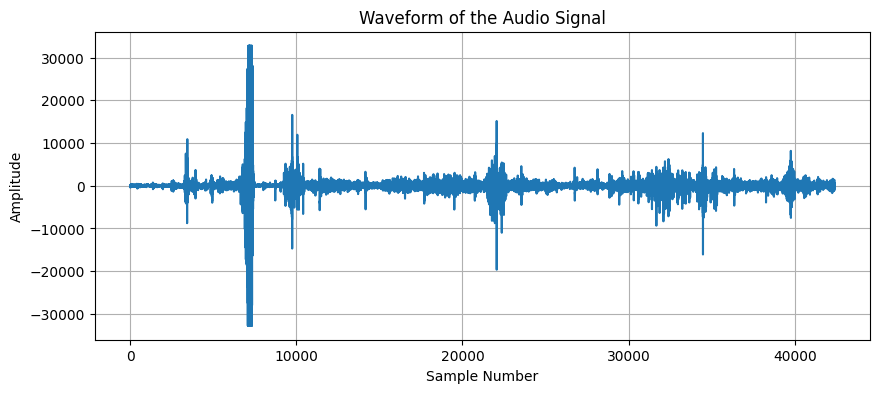

In [2]:
frames = wav_file.readframes(num_frames)
wav_file.close()                          
audio_data = np.frombuffer(frames, dtype=np.int16)
if num_channels > 1:
    audio_data = np.reshape(audio_data, (-1, num_channels))
print("Audio Array:", audio_data)
print("Array Shape:", audio_data.shape)

plt.figure(figsize=(10, 4))
if num_channels > 1:
    plt.plot(audio_data[:, 0])  
else:
    plt.plot(audio_data)        
plt.title('Waveform of the Audio Signal')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [3]:
from IPython.display import Audio
audio_to_play = audio_data[:, 0] if num_channels > 1 else audio_data

Audio(audio_to_play, rate=frame_rate)

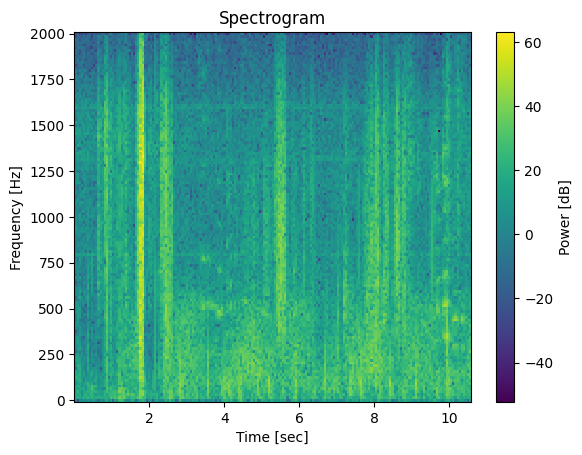

In [4]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(audio_data[:,0] if num_channels > 1 else audio_data, frame_rate)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.colorbar(label='Power [dB]')
plt.show()

Shape fitur: (656, 13)
Bunlabelledtest__101_1305030823364_A.wav --> Cluster 0
Bunlabelledtest__101_1305030823364_D.wav --> Cluster 1
Bunlabelledtest__101_1305030823364_F.wav --> Cluster 1
Bunlabelledtest__103_1305031931979_A.wav --> Cluster 0
Bunlabelledtest__103_1305031931979_C.wav --> Cluster 1
Bunlabelledtest__105_1305033453095_B.wav --> Cluster 0
Bunlabelledtest__105_1305033453095_D.wav --> Cluster 2
Bunlabelledtest__106_1306776721273_B.wav --> Cluster 1
Bunlabelledtest__106_1306776721273_D.wav --> Cluster 2
Bunlabelledtest__107_1305654946865_B.wav --> Cluster 2
Bunlabelledtest__107_1305654946865_D.wav --> Cluster 2
Bunlabelledtest__108_1305654420093_C.wav --> Cluster 1
Bunlabelledtest__109_1305653646620_B.wav --> Cluster 2
Bunlabelledtest__109_1305653646620_D.wav --> Cluster 0
Bunlabelledtest__109_1305653972028_B.wav --> Cluster 1
Bunlabelledtest__109_1305653972028_D.wav --> Cluster 1
Bunlabelledtest__110_1305655332337_D.wav --> Cluster 0
Bunlabelledtest__112_1306243000964_C.wav -

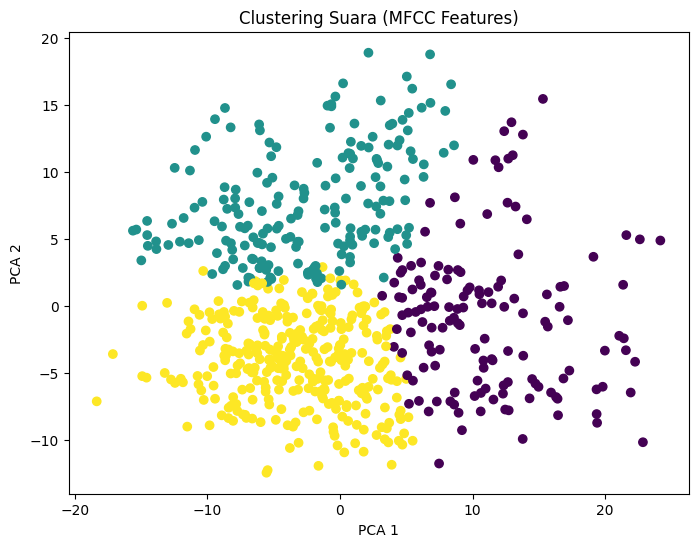

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# === 1. Load audio dari folder ===
folder = "set_b"
features = []
filenames = []

for file in os.listdir(folder):
    if file.endswith(".wav"):
        path = os.path.join(folder, file)
        sr, y = wavfile.read(path)
        # pastikan mono
        if y.ndim > 1:
            y = y[:,0]  
        # ambil fitur MFCC
        mfcc_feat = mfcc(y, samplerate=sr, numcep=13)
        mfcc_mean = np.mean(mfcc_feat, axis=0)
        features.append(mfcc_mean)
        filenames.append(file)

features = np.array(features)
print("Shape fitur:", features.shape)

# === 2. Clustering dengan K-Means ===
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(features)

# tampilkan hasil cluster tiap file
for f, l in zip(filenames, labels):
    print(f"{f} --> Cluster {l}")

# === 3. Evaluasi Silhouette ===
score = silhouette_score(features, labels)
print("Silhouette Score:", score)

# === 4. Visualisasi PCA ===
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap="viridis")
plt.title("Clustering Suara (MFCC Features)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter
from python_speech_features import mfcc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

folder = "set_b"
features = []
filenames = []
for file in os.listdir(folder):
    if file.endswith(".wav"):
        path = os.path.join(folder, file)
        sr, y = wavfile.read(path)
        if y.ndim > 1:
            y = y[:, 0]
            
        y_normalized = y / np.max(np.abs(y))
        lowcut = 20.0     
        highcut = 150.0    
        fs = sr            
        order = 6          
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='band')
        y_filtered = lfilter(b, a, y_normalized)
        
        mfcc_feat = mfcc(y_filtered, samplerate=sr, numcep=13)
        mfcc_mean = np.mean(mfcc_feat, axis=0)
        features.append(mfcc_mean)
        filenames.append(file)

features = np.array(features)
print("Shape fitur:", features.shape)

Shape fitur: (656, 13)


Bunlabelledtest__101_1305030823364_A.wav --> Cluster 1
Bunlabelledtest__101_1305030823364_D.wav --> Cluster 2
Bunlabelledtest__101_1305030823364_F.wav --> Cluster 0
Bunlabelledtest__103_1305031931979_A.wav --> Cluster 1
Bunlabelledtest__103_1305031931979_C.wav --> Cluster 1
Bunlabelledtest__105_1305033453095_B.wav --> Cluster 1
Bunlabelledtest__105_1305033453095_D.wav --> Cluster 2
Bunlabelledtest__106_1306776721273_B.wav --> Cluster 0
Bunlabelledtest__106_1306776721273_D.wav --> Cluster 0
Bunlabelledtest__107_1305654946865_B.wav --> Cluster 1
Bunlabelledtest__107_1305654946865_D.wav --> Cluster 1
Bunlabelledtest__108_1305654420093_C.wav --> Cluster 2
Bunlabelledtest__109_1305653646620_B.wav --> Cluster 1
Bunlabelledtest__109_1305653646620_D.wav --> Cluster 2
Bunlabelledtest__109_1305653972028_B.wav --> Cluster 0
Bunlabelledtest__109_1305653972028_D.wav --> Cluster 1
Bunlabelledtest__110_1305655332337_D.wav --> Cluster 1
Bunlabelledtest__112_1306243000964_C.wav --> Cluster 0
Bunlabelle

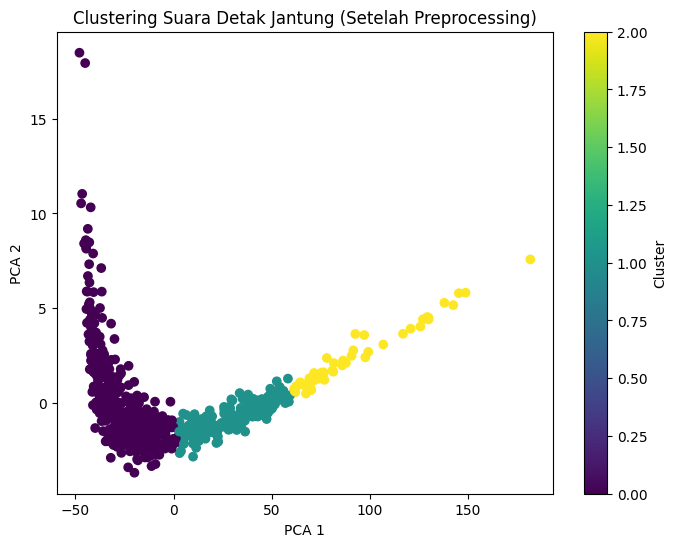

In [12]:
# === 2. Clustering dengan K-Means ===
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(features)
for f, l in zip(filenames, labels):
    print(f"{f} --> Cluster {l}")

# === 3. Evaluasi dengan Silhouette Score ===
score = silhouette_score(features, labels)
print("\nSilhouette Score:", score)

# === 4. Visualisasi dengan PCA ===
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)
plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap="viridis")
plt.title("Clustering Suara Detak Jantung (Setelah Preprocessing)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

In [8]:
score = silhouette_score(features, labels)
print("\nSilhouette Score:", score)


Silhouette Score: 0.24447451445718438


In [9]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(features)
for f, l in zip(filenames, labels):
    print(f"{f} --> Cluster {l}")

Bunlabelledtest__101_1305030823364_A.wav --> Cluster 2
Bunlabelledtest__101_1305030823364_D.wav --> Cluster 2
Bunlabelledtest__101_1305030823364_F.wav --> Cluster 0
Bunlabelledtest__103_1305031931979_A.wav --> Cluster 2
Bunlabelledtest__103_1305031931979_C.wav --> Cluster 1
Bunlabelledtest__105_1305033453095_B.wav --> Cluster 2
Bunlabelledtest__105_1305033453095_D.wav --> Cluster 1
Bunlabelledtest__106_1306776721273_B.wav --> Cluster 1
Bunlabelledtest__106_1306776721273_D.wav --> Cluster 0
Bunlabelledtest__107_1305654946865_B.wav --> Cluster 0
Bunlabelledtest__107_1305654946865_D.wav --> Cluster 0
Bunlabelledtest__108_1305654420093_C.wav --> Cluster 2
Bunlabelledtest__109_1305653646620_B.wav --> Cluster 0
Bunlabelledtest__109_1305653646620_D.wav --> Cluster 0
Bunlabelledtest__109_1305653972028_B.wav --> Cluster 1
Bunlabelledtest__109_1305653972028_D.wav --> Cluster 2
Bunlabelledtest__110_1305655332337_D.wav --> Cluster 2
Bunlabelledtest__112_1306243000964_C.wav --> Cluster 1
Bunlabelle

In [10]:
mfcc_feat = mfcc(y_filtered, samplerate=sr, numcep=13)
mfcc_mean = np.mean(mfcc_feat, axis=0)
features.append(mfcc_mean)
filenames.append(file)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

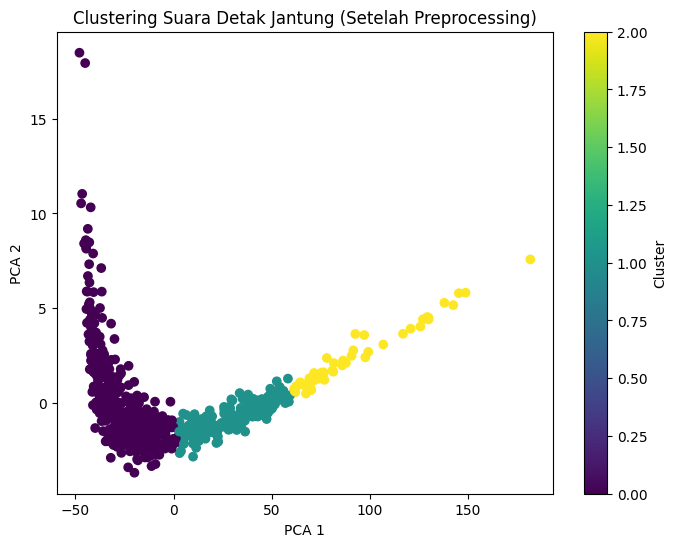

In [ ]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)
plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap="viridis")
plt.title("Clustering Suara Detak Jantung (Setelah Preprocessing)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()